##Importing Libraries required for accessing the directories of the images.

In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

##Importing Other Libraries for visualizing plots as well asd data preprocessings.

In [2]:
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers, optimizers, callbacks

##Downloading the dataset from the Kaggle.

In [3]:
!kaggle datasets download -d ashishmotwani/tomato

Dataset URL: https://www.kaggle.com/datasets/ashishmotwani/tomato
License(s): copyright-authors
100% 1.37G/1.37G [00:38<00:00, 36.1MB/s]
100% 1.37G/1.37G [00:38<00:00, 38.0MB/s]


In [4]:
!ls

drive  sample_data  tomato.zip


##Extracting the zip files.

In [5]:
with ZipFile('tomato.zip', 'r') as zip_ref:
    zip_ref.extractall()

##Full_directory if the variable that consists of all unzipped folders fromthe kaggle dataset.

In [6]:
full_dir = '/content/Untitled Folder'

##Having a quick look into the sub directories inside the full_directory.

In [7]:
print(os.listdir(full_dir))

['valid', 'train']


In [8]:
print(len(os.listdir('Untitled Folder/train')))
print(os.listdir('Untitled Folder/train')[:5])

print(len(os.listdir('Untitled Folder/valid')))
print(os.listdir('Untitled Folder/train')[:5])


11
['Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Early_blight', 'Spider_mites Two-spotted_spider_mite', 'powdery_mildew']
11
['Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Early_blight', 'Spider_mites Two-spotted_spider_mite', 'powdery_mildew']


##We are going to  use test sub_directory for training and validation of the dataset and then we will test the performance the model's performance in thetest set (valid sub directory).

In [9]:
base_dir='/content/Untitled Folder/train'

##Having a quick look at the single image to get an idea about the colour of the image, if it  is RBG or Grayscale.

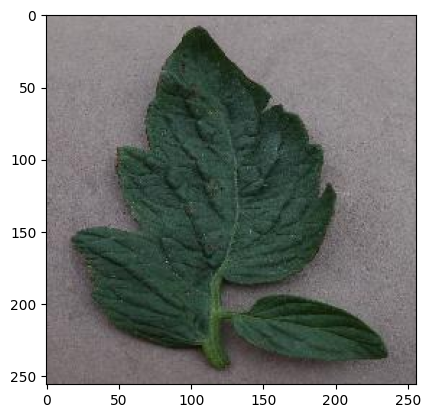

In [10]:
image_path = '/content/Untitled Folder/train/Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'
img=mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

In [11]:
import seaborn as sns
import pandas as pd

##Getting idea about the base_dir  using bar plot.

In [12]:
class_names = os.listdir(base_dir)
class_counts = {cls: len(os.listdir(os.path.join(base_dir, cls))) for cls in class_names}

<ipython-input-13-9540708805c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Category', x='Count', palette='viridis')


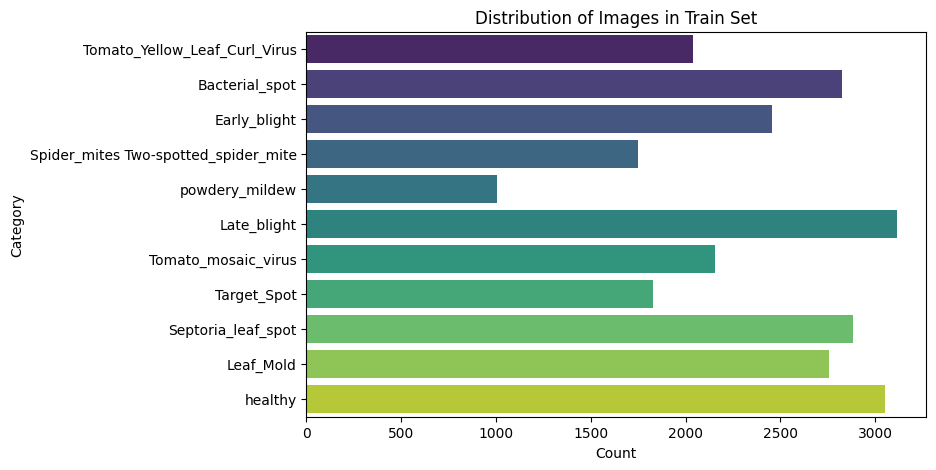

In [13]:
df = pd.DataFrame(list(class_counts.items()), columns=['Category', 'Count'])
plt.figure(figsize=(8, 5))
sns.barplot(data=df, y='Category', x='Count', palette='viridis')

plt.title('Distribution of Images in Train Set')
plt.show()

In [14]:
#sns.countplot(data=os.listdir('Untitled Folder/train'), x=os.listdir('Untitled Folder/train'))

##We  are creating some variables for duture easy access, maybe we  will use or maybe I will set manually. where i have set img_size, batch_size and 11 classes since we have 11  classes of images.

In [15]:
img_size = (128, 128)
batch_size = 32
num_classes = 11

##We are using data generator for image processing and I am using augmentation as I was getting overfitting  too often during training but I will nott use it for validation set.

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

## I havenot used data augmentation here and I am  rescaling only.

In [17]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


##Applying the data gen along with augmentation and rescaling for training set.

In [18]:
train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 20686 images belonging to 11 classes.


##Applying rescaling and data generator to the validation set.

In [19]:
val_gen = val_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 5165 images belonging to 11 classes.


##Finally time to make a model I am using manual batch size and image size size. I have set 3 because of the RGB images and hidden layers were made using activation function relu and to get the final output I will be using Softmax as it a multicllass classification.

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(11, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           2,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,518,859 (24.87 MB)

 Trainable params: 6,518,859 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

#I am complying model using optimizer adam and loss as categorical_crossentropy because I am noot converting images into array manually so I can avoid sparse.

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Time to train the model I have set number of epchos as 20 we can adjust it depending on different factors.

In [23]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 146s 214ms/step - accuracy: 0.3023 - loss: 1.9240 - val_accuracy: 0.4769 - val_loss: 1.7296
Epoch 2/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 156s 241ms/step - accuracy: 0.6022 - loss: 1.1280 - val_accuracy: 0.7727 - val_loss: 0.6538
Epoch 3/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 175s 200ms/step - accuracy: 0.6745 - loss: 0.9218 - val_accuracy: 0.7706 - val_loss: 0.6653
Epoch 4/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 131s 202ms/step - accuracy: 0.7068 - loss: 0.8287 - val_accuracy: 0.6676 - val_loss: 1.1705
Epoch 5/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 133s 206ms/step - accuracy: 0.7209 - loss: 0.7970 - val_accuracy: 0.7919 - val_loss: 0.6206
Epoch 6/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 132s 204ms/step - accuracy: 0.7356 - loss: 0.7347 - val_accuracy: 0.7959 - val_loss: 0.6013
Epoch 7/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 134s 207ms/step - accuracy: 0.7542 - loss: 0.6813 - val_accuracy: 0.6788 - val_loss: 1.1929
Epoch 8/20
647/647 ━━━━━━━━━━━━━━━━━━━━ 133s 205ms/step - accuracy: 0.7633 -

## The validation accuracy till 20 epchos is 85% with loss of 47% and this means my model performs solid on the validation set. And the accuracuy is 82%..

In [25]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc}")
print(f"Validation Loss: {val_loss}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8221 - loss: 0.5367
Validation Accuracy: 0.8499516248703003
Validation Loss: 0.4777561128139496


In [26]:
# Make predictions on the validation set
val_predictions = model.predict(val_gen)
val_pred_classes = np.argmax(val_predictions, axis=1)

162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


In [27]:
true_labels = val_gen.classes

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
cm = confusion_matrix(true_labels, val_pred_classes)

In [30]:
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

##Using confusion Matrix in percentage for aacuracy of the model.

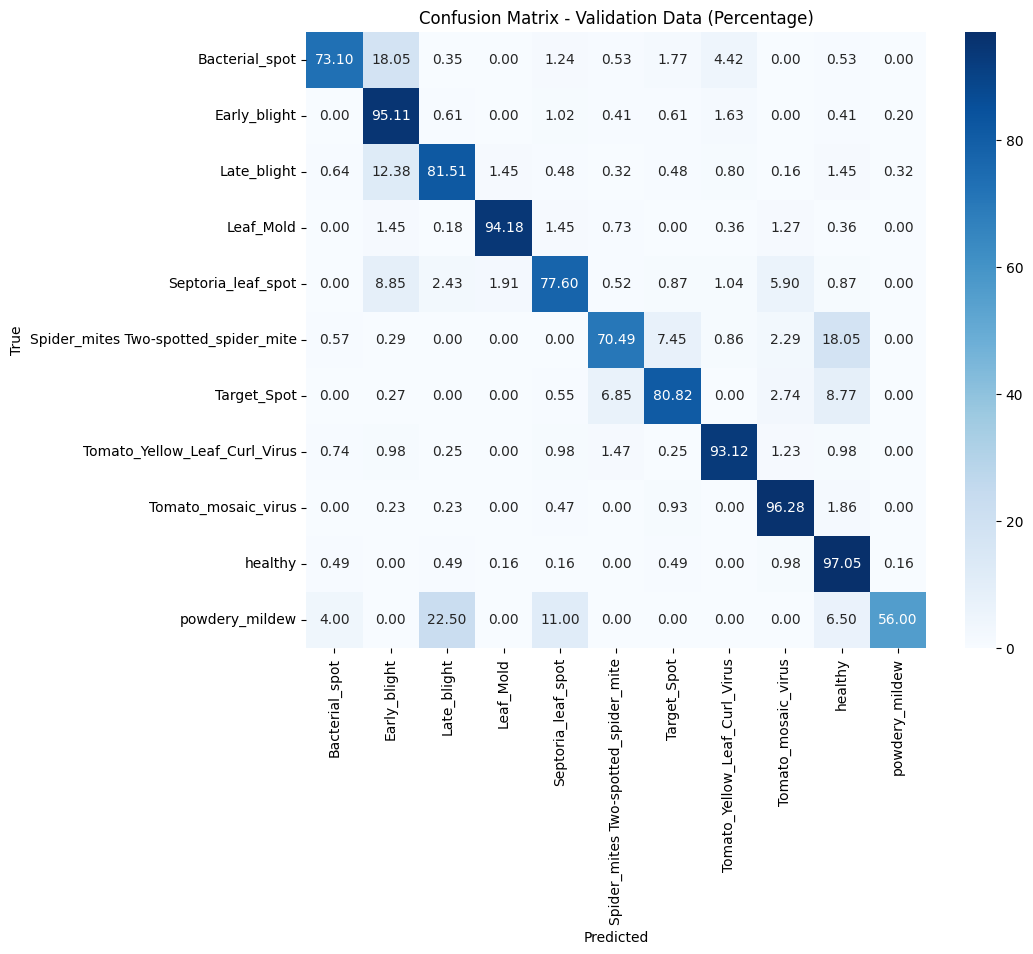

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Data (Percentage)')
plt.show()

##We vcan see that the model is struggling with the powdery_mildew images, this could be because of less number of images.

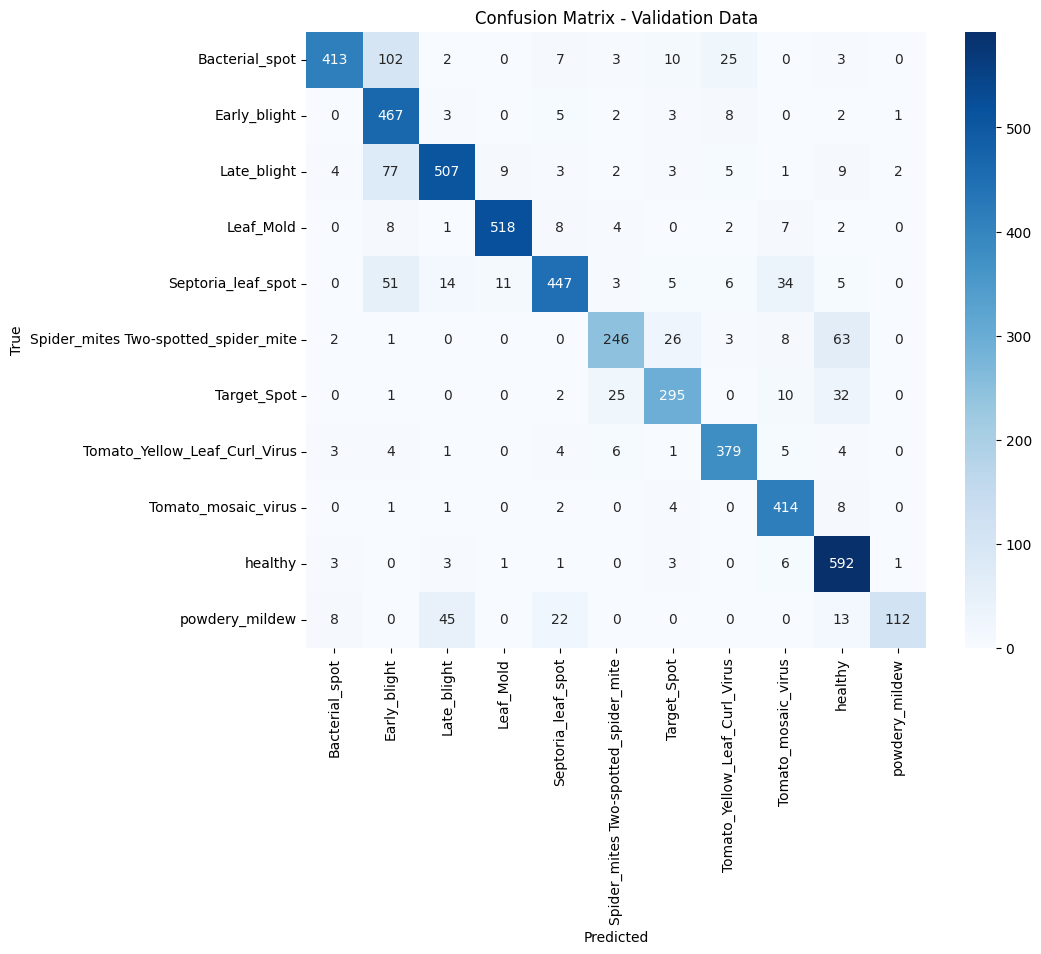

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Data')
plt.show()


##Using accuracy graph to se the relation between Accuracy and and validation accuracy in different epochs.

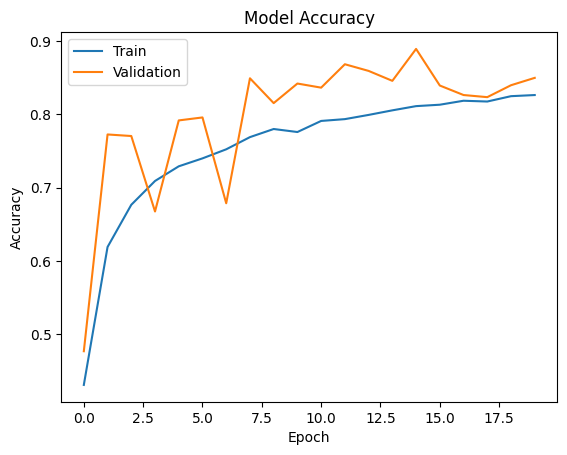

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Acccuracy graph to show the relation betwenn loss and validation loss between diffrent epochs.

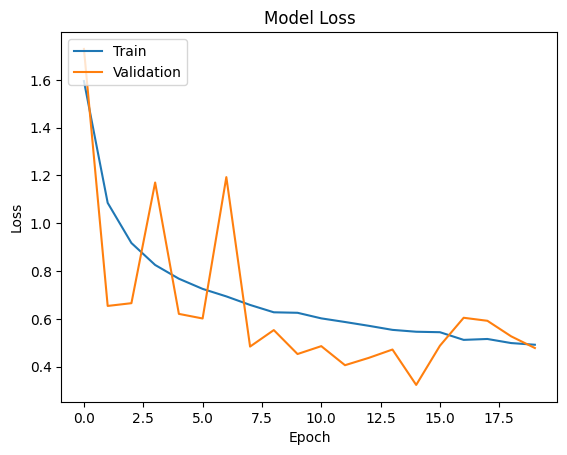

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

##Since the model was trained I wanted to test the model with the test set which in the sub directory valid.

In [35]:
test_dataet= ImageDataGenerator(rescale=1./255)

In [36]:
test_generator= test_dataet.flow_from_directory(
    '/content/Untitled Folder/valid',
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 6683 images belonging to 11 classes.


In [37]:
test_loss, test_acc = model.evaluate(test_generator)


  1/209 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.6562 - loss: 1.0207

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.7872 - loss: 0.6232


##We can see that the test accuracy with the test set was 82% which is good with the test loss of 53%.

In [38]:
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

Test Accuracy: 0.8268741369247437
Test Loss: 0.5364767909049988


##Finally since the model was ready, the llast task was to save the model for future use.

In [39]:
model.save('tomato_model.h5')
print('Model saved!')

Model saved!
